In [530]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns 
plt.style.use("ggplot")
pd.set_option("display.max_columns" ,40) # to see all the columns(here 40) for bigger datasets

In [531]:
# readign data using pandas lib
df = pd.read_csv("train.csv")
print(f"the dataframe has [{df.shape[0]}] rows and [{df.shape[1]}] columns")
print(f"the columns are : \n{df.columns}")

the dataframe has [891] rows and [12] columns
the columns are : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [532]:
# df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]


each columns has : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 null values


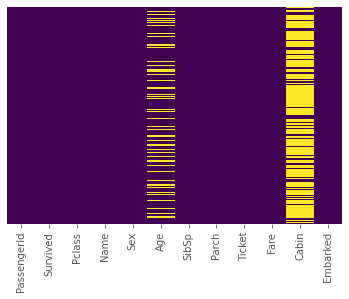

In [533]:
print(f"each columns has : \n{df.isnull().sum()} null values") # how many null does each columns have
# print(f"rows with missing values are : \n{df[df.isnull().any(axis=1)].head(20)}") # all te rows that have at least one missing value 
# heatmap of the missing values 
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


In [534]:
# convering sex to numeric values 
df['Sex'] = df['Sex'].map({'male':0 , 'female':1}) # male = 0 , female = 1 

In [535]:
# adding some value for the mising values of the age ... (we will add the median of the age)
df['Age'].fillna(df['Age'].describe().loc[['50%']][0], inplace=True)

#for the Embarked as well 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_173001/629090152.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Age'].fillna(df['Age'].describe().loc[['50%']][0], inplace=True)
/tmp/ipykernel_173001/629090152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].describe().loc[['50%']][0], inplace=True)
/tmp/ipykernel_173001/629090152.py:5: 

In [536]:
print(F"unique values for Embarked is : {df['Embarked'].unique()}")
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # if both Q ,S are zero then we can say that it's C

unique values for Embarked is : ['S' 'C' 'Q']


In [537]:
df.drop(['Name' , 'Ticket' , 'Cabin'] ,axis=1 , inplace=True) # removign these becuase they dont effect the training

In [538]:
# trying to nomalize the dataset
from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler = StandardScaler() # THE SET values between 0 ,1 
df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])
df.head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [539]:
y = df['Survived'] # this is the lables
X = df.drop(columns=['PassengerId' , 'Survived'] , axis=1)

In [540]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% of the data for testing
print(f"X_train type is : {type(X_train)}")
print(f"X_train size is : {X_train.shape}")
print(f"X_test size is : {X_test.shape}")
print(f"y_train size is : {y_train.shape}")
print(f"y_test size is : {y_test.shape}")

X_train type is : <class 'pandas.core.frame.DataFrame'>
X_train size is : (712, 8)
X_test size is : (179, 8)
y_train size is : (712,)
y_test size is : (179,)


In [541]:
n_x = 8 # this is for the number of features 

n_h1 = 32 # this is the hidden layer 1 neurans 
n_h2 = 16 # this is the hidden layer 2 neurans
n_y = 1 # output layer (becuase this s a binary classification we have 1)

# init for random weights and biases 
W1 = np.random.randn(n_h1, n_x) * 0.01  # Shape: (n_h1, n_x)
b1 = np.zeros((n_h1, 1))  # Shape: (n_h1, 1)
W2 = np.random.randn(n_h2, n_h1) * 0.01  # Shape: (n_h2, n_h1)
b2 = np.zeros((n_h2, 1))  # Shape: (n_h2, 1)
W3 = np.random.randn(n_y, n_h2) * 0.01  # Shape: (n_y, n_h2)
b3 = np.zeros((n_y, 1))  # Shape: (n_y, 1)

### Activation functions
- Relu for hidden layer
- sigmoid for output layer

In [542]:
def relu(Z):
    return np.maximum(0 ,Z)

def sigmoid(Z):
    Z = np.array(Z, dtype=np.float64) # convert the type so we dont get any error
    return 1 / (1 + np.exp(-Z))

### forwand propagation
- Z[1] = W[1]X + b[1] ==> A[1] = ReLU(Z[1])
- Z[2] = W[2]A[1] + b[2] ==> A[2] = sigmoid(Z[2])



In [543]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    # Hidden layer 1
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    # Hidden layer 2
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    # Output layer
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    res = (Z1, A1, Z2, A2, Z3, A3)
    return A3, res

### Cost Function (cross-entropy loss)
- J = $-\frac{1}{m}\sum_{i=1}^{m} [y^i\log{({A_{3}}^{(i)})} + (1 - y^{(i)})\log{(1 -{A_{3}}^{(i)} )}]$

In [544]:
def compute_cost(A3, Y):
    m = Y.shape[1]  # number of examples
    
    cost = -np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3)) / m
    cost = np.squeeze(cost)  # cost should be scalar
    return cost

### backward propagation
- Gradient for output layer
    - error term for output layer is : 
    $dZ^{[2]} = A^{[2]} - Y$
    - then we have <br>
     $ dW^{[2]} = \frac{1}{m}dZ^{[2]}.(A^{[1]})^{T} $ <br>
     $ db^{[2]} = \ \frac{1}{m}\sum_{}dZ^{[2]}$ <br>
- Gradient for output layer
    - propagate the error back <br>
    $dA^{[1]} = (W^{[2]})^{T}dZ^{[2]}$ <br>
    - for ReLU  , the drivite $\frac{d}{dx}ReLU(Z)$ is 1 if $z > 0$ and 0 otherwise <br>
    $ dZ^{[1]} = dA^{[1]} * g'(Z^{[2]})$ <br>
    where $ g'(Z^{[1]}) = 1$ if $Z^{[1]} > 0$ , else 0. <br>
    - then <br>
    $dW^{[1]} = \frac{1}{m}dZ^{[1]}.X^{T}$ <br>
    $db^{[1]} = \frac{1}{m}\sum_{}dZ^{[1]}$

In [545]:
def backward_propagation(X, Y, cache, W2, W3):
    m = X.shape[1]
    Z1, A1, Z2, A2, Z3, A3 = cache

    # Output layer error
    dZ3 = A3 - Y  # Shape: (1, m)
    dW3 = (1/m) * np.dot(dZ3, A2.T)  # Shape: (1, n_h2)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    # Hidden layer 2 error
    dA2 = np.dot(W3.T, dZ3)  # Shape: (n_h2, m)
    dZ2 = dA2 * (Z2 > 0)  # Derivative of ReLU
    dW2 = (1/m) * np.dot(dZ2, A1.T)  # Shape: (n_h2, n_h1)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer 1 error
    dA1 = np.dot(W2.T, dZ2)  # Shape: (n_h1, m)
    dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
    dW1 = (1/m) * np.dot(dZ1, X.T)  # Shape: (n_h1, n_x)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return gradients

### updating the parameters
- $parameter = parameter - \alpha \times gradinet $

In [546]:
def update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate):
    W1 = W1 - learning_rate * gradients["dW1"]
    b1 = b1 - learning_rate * gradients["db1"]
    W2 = W2 - learning_rate * gradients["dW2"]
    b2 = b2 - learning_rate * gradients["db2"]
    W3 = W3 - learning_rate * gradients["dW3"]
    b3 = b3 - learning_rate * gradients["db3"]
    
    return W1, b1, W2, b2, W3, b3

In [547]:
costs = []

def neural_network_model(X, Y, n_h1, n_h2, num_iterations=10000, learning_rate=0.01, print_cost=False):
    np.random.seed(42)  # for reproducibility
    n_x = X.shape[0]
    n_y = Y.shape[0]

    # Initialize parameters
    W1 = np.random.randn(n_h1, n_x) * 0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_h2, n_h1) * 0.01
    b2 = np.zeros((n_h2, 1))
    W3 = np.random.randn(n_y, n_h2) * 0.01
    b3 = np.zeros((n_y, 1))

    for i in range(num_iterations):
        A3, cache = forward_propagation(X, W1, b1, W2, b2, W3, b3)
        
        cost = compute_cost(A3, Y)
        costs.append(cost)
        
        gradients = backward_propagation(X, Y, cache, W2, W3)
        
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
                  
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return parameters

In [548]:
# runnning the code 
X_train_np = X_train.values.T  # Now shape is (n_x, m_train)
y_train_np = y_train.values.reshape(1, -1)  # Shape: (1, m_train)

# Similarly for test data:
X_test_np = X_test.values.T    # Shape: (n_x, m_test)
y_test_np = y_test.values.reshape(1, -1)      # Shape: (1, m_test)

# Train the network:
parameters = neural_network_model(X_train_np, y_train_np, 
                                  n_h1=32,  # number of neurons in the first hidden layer
                                  n_h2=16,  # number of neurons in the second hidden layer
                                  num_iterations=10000, 
                                  learning_rate=0.05, 
                                  print_cost=True)

Cost after iteration 0: 0.6931508300401205
Cost after iteration 1000: 0.662259712582175
Cost after iteration 2000: 0.6621751715136382
Cost after iteration 3000: 0.6574651820122324
Cost after iteration 4000: 0.4332731926072267
Cost after iteration 5000: 0.4004852114047619
Cost after iteration 6000: 0.39118356799794096
Cost after iteration 7000: 0.38611864758626485
Cost after iteration 8000: 0.38193082034063996
Cost after iteration 9000: 0.378110923391532


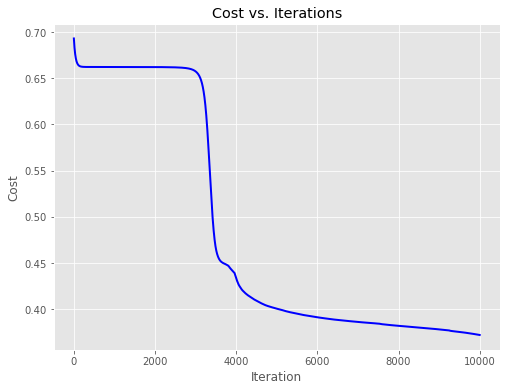

In [549]:
iterations = np.arange(0, len(costs)) 

plt.figure(figsize=(8, 6))
plt.plot(iterations, costs, 'b-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.grid(True)
plt.show()

In [550]:
A3_test, _ = forward_propagation(X_test_np, parameters["W1"], parameters["b1"],
                                  parameters["W2"], parameters["b2"], parameters["W3"], parameters["b3"])

predictions = (A3_test > 0.5).astype(int)

accuracy = np.mean(predictions == y_test_np)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8156424581005587


In [551]:
def predict_survival_single(test_data, parameters):
    A2_test, _ = forward_propagation(test_data, parameters["W1"], parameters["b1"],
                                      parameters["W2"], parameters["b2"], parameters["W3"], parameters["b3"] )
    prediction = (A2_test > 0.5).astype(int)
    return prediction

# Example test case
test_data = np.array([[1, 1, 0., 0.0, 0.0, 0.1, False, False]]).T
prediction = predict_survival_single(test_data, parameters)
print("Survived (1) or Did not Survive (0):", prediction)

Survived (1) or Did not Survive (0): [[1]]


In [552]:
df_test = pd.read_csv("test.csv")
print(f"number of the tests are {len(df_test)}")

number of the tests are 418


In [553]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [554]:
# adding some value for the mising values of the age ... (we will add the median of the age)
df_test['Age'].fillna(df_test['Age'].describe().loc[['50%']][0], inplace=True)
#for the Embarked as well 
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_173001/1872274311.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_test['Age'].fillna(df_test['Age'].describe().loc[['50%']][0], inplace=True)
/tmp/ipykernel_173001/1872274311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].describe().loc[['50%']][0], inplace=True)
/tmp/ipykernel_1

In [555]:
print(F"unique values for Embarked is : {df_test['Embarked'].unique()}")
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True) # if both Q ,S are zero then we can say that it's C

unique values for Embarked is : ['Q' 'S' 'C']


In [556]:
df_test.drop(['Name' , 'Ticket' , 'Cabin'] ,axis=1 , inplace=True) # removign these becuase they dont effect the training

In [557]:
df_test[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df_test[['Age', 'Fare', 'SibSp', 'Parch']])
df_test.head()
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [558]:
X_test_df = df_test.drop(columns=['PassengerId'], axis=1).values.T

In [559]:
test_predictions, _ = forward_propagation(X_test_df, parameters["W1"], parameters["b1"],
                                          parameters["W2"], parameters["b2"], parameters["W3"], parameters["b3"])
test_predictions = (test_predictions > 0.5).astype(int)

/tmp/ipykernel_173001/1958287605.py:2: RuntimeWarning: invalid value encountered in maximum
  return np.maximum(0 ,Z)


In [560]:
df_test['Survived'] = test_predictions.T
print(df_test[['PassengerId', 'Survived']])

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [561]:
# same to csv
df_test[['PassengerId', 'Survived']].to_csv('test_predictions.csv', index=False)

In [562]:
# comparing with the actual datatest awnser 
predictions_df = pd.read_csv("test_predictions.csv")
correct_answers_df = pd.read_csv("correct_awnser.csv")

y_pred = predictions_df["Survived"].values  # Predictions
y_true = correct_answers_df["Survived"].values  # Ground truth

accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 77.27%
